# Presentacion

Considere el siguiente **SLIT**:

![Conversor Sigma Delta](Practico5.tiff )
Muestre que la transformada Z de la señal de salida resulta
$$Y(z) = X(z)z^{−1} + Q(z)(1 − z^{−1})^2$$

# Desarrollo

$y[n]=s_2[n]+q[n]$

$y[n]=e_2[n]\ast h_2[n]+q[n]$

$y[n]=(s_1[n]-y[n])\ast h_2[n]+q[n]$

$y[n]=(e_1[n]\ast h_1[n]-y[n])\ast h_2[n]+q[n]$

$y[n]=\big((x[n]-y[n])\ast h_1[n]-y[n]\big)\ast h_2[n]+q[n]$
Aplico Transformada $\mathbb{Z}$




$Y(z)=\big((X(z)-Y(z))H_1(z)-Y(z)\big)H_1(z)+Q(z)$

$Y(z)=\big((X(z)-Y(z))\frac{1}{1-z^{-1}}-Y(z)\big)\frac{z^{-1}}{1-z^{-1}}+Q(z)$




$Y(z)=\big(\frac{X(z)}{1-z^{-1}}- \frac{Y(z)}{1-z^{-1}}-Y(z)\big)\frac{z^{-1}}{1-z^{-1}}+Q(z)$


$Y(z)(1-z^{-1})^2=\big(X(z)- Y(z)-Y(z)(1-z^{-1})\big)z^{-1}+Q(z)(1-z^{-1})^2$

$Y(z)(1-z^{-1})^2=\big(X(z)- 2Y(z)+Y(z) z^{-1}\big)z^{-1}+Q(z)(1-z^{-1})^2$

$Y(z)-2Y(z)z^{-1}+Y(z)z^{-2}=X(z)z^{-1}-2Y(z)z^{-1}+Y(z) z^{-2}+Q(z)(1-z^{-1})^2$

$Y(z)=X(z)z^{-1}+Q(z)(1-z^{-1})^2$






# Simulacion

## M=2^4 y R=4

In [1]:
%matplotlib inline
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] =  13,9


import matplotlib.pyplot as pl
import commpy 
import scipy.signal 




In [2]:
ON=1;
OFF=0;
f0=1.0e6;              #% Ancho de banda, en Hz
M=2^4;                 #% Factor de sobremuestreo del SD (sigma-delta)
R=4;                   #% Factor de sobremuestreo despues del diezmado (>2 para cumplir Nyquist)

In [3]:
fs=R*f0*M;             #% Frecuencia de muestreo, in Hz
Ts=1/fs;
N=15000;
#%============================================
#% Generacion de senal en bandabase
#%============================================
t,g=commpy.rcosfilter(4000/M, .1, 1/f0, fs)  #% Filtro Tx a R*M

t,gR=commpy.rcosfilter(4000, .1, 1/f0, f0*R)  #% Filtro Tx a M
ak = 2*np.random.randint(2,size=(1,N))-1


xn=np.zeros((N*int(fs/f0)))
xnR=np.zeros((N*R))


xn[::R*M]=ak
xnR[::R]=ak

x=scipy.signal.lfilter(g,1,xn);

x=x[10:]*.25
xR=scipy.signal.lfilter(gR/(1.*sum(gR)),1,xnR);

#%============================================
#% Conversor Sigma-Delta de 2do Orden y Filtro CIC de 2 Etapas
#%============================================
e1=np.zeros(N*M);
e2=np.zeros(N*M);
s1=np.zeros(N*M);
s2=np.zeros(N*M);
y=np.ones(N*M);
xhat=np.zeros(N);
xhat1=np.zeros(N);
xhat2=np.zeros(N);
k=1;
y_acum1=0;
y_acum2=0;
for n in range(1,N*M):
    e1[n]=x[n]-y[n-1];
    s1[n]=e1[n]+s1[n-1];
    e2[n]=s1[n]-y[n-1];
    s2[n]=e2[n]+s2[n-1];
    y[n]= 1. if s2[n]>0 else -1.;
    #%y(n)=s2(n)*1.0+4.*(rand-.5); #% Prueba con ruido blanco
    y_acum1=np.mod(y_acum1+y[n]+1.,2*(M**2)); #% La senal de entrada del CIC es positiva [0 2] con media 1!
    y_acum2=np.mod(y_acum2+y_acum1,2*(M**2));
    if n%M==0:
        xhat1[k]=y_acum2;
        xhat2[k]=(xhat1[k]-xhat1[k-1])%(2*M**2);
        xhat[k]=(xhat2[k]-xhat2[k-1])%(2*M**2);
        k=k+1;

xhat=xhat[-20000:]/(M**2)-1; #% Ajuste de ganancia (DC=1) y eliminacion de continua
xR=scipy.signal.lfilter(gR/(1.*sum(gR)),1,xhat);


   

1000
1000


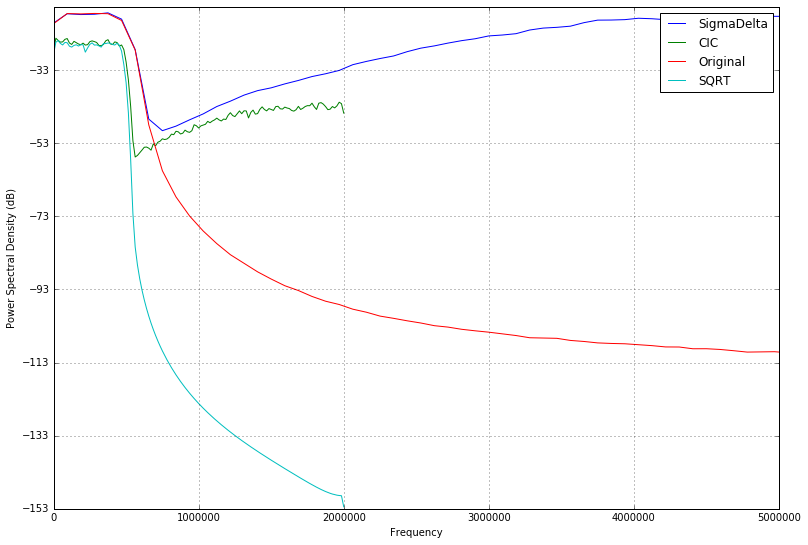

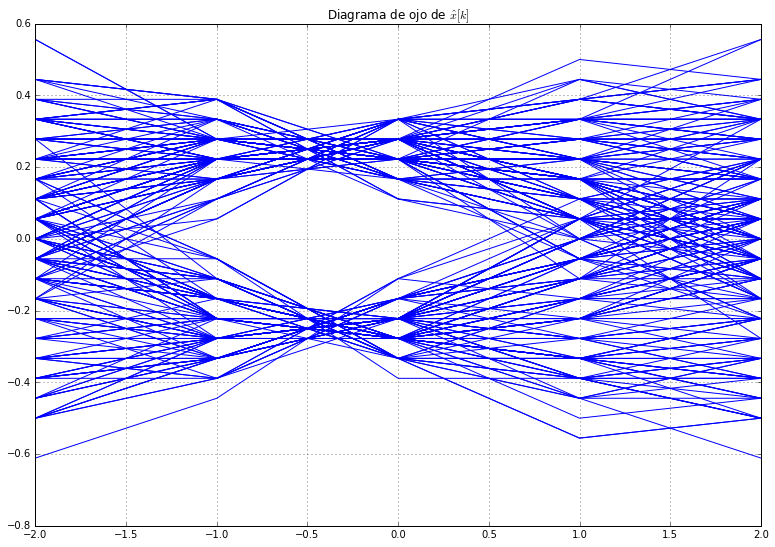

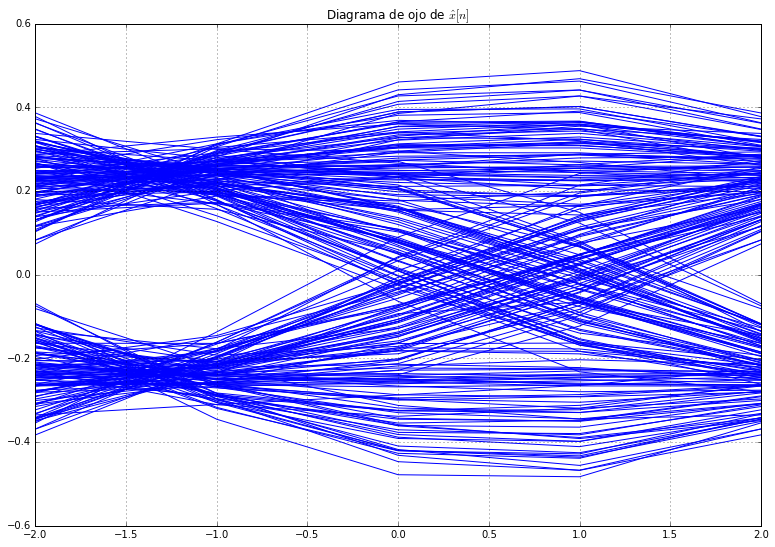

In [4]:


#pl.plot(xhat[-200:])
#pl.grid(True)
#pl.title(r'$\hat{x}$')


pl.figure()
pl.psd(y,Fs=f0*R*M,scale_by_freq=False,label='SigmaDelta')
pl.psd(xhat,Fs=f0*R,scale_by_freq=False,label='CIC')
pl.psd(x,Fs=fs,scale_by_freq=False,label='Original')
pl.psd(xR,Fs=f0*R,scale_by_freq=False,label='SQRT')


pl.legend()
pl.xlim((0,5e6))


#pl.xscale('log')
pl.draw()
def plot_eye(sn,d=3):
    pl.figure()
    L=100
    M=R
    n_symbols=N
     #d = Delay para centrar el ojo
    pl.hold(True)
    print len(sn)
    for m in range(d,len(sn)/R-d):
        sn_p = sn[m*M+d-1:m*M+d+M];
        pl.plot(range(-M/2,M/2+1),sn_p,'b')

plot_eye (xhat[-1000:],2)
pl.title(r'Diagrama de ojo de $\hat{x}[k]$')
pl.grid(True)


pl.figure()



plot_eye(xR[-1000:],3)
pl.title(r'Diagrama de ojo de $\hat{x}[n]$')


pl.grid(True)


pl.draw()

### Conclusion 

El conversor sigma delta suma ruido de cuantizacion en las frecuencias altas. Aplicar un filtro coseno realzado a la salida del filtro CIC mejor la relacion señal ruido ya que elimina el ruido de cuantizacion del sigma delta que el CIC no termina de rechazar.

## M=2^4 y R=8


=== Executing: ===
fs=R*f0*M;             #% Frecuencia de muestreo, in Hz
Ts=1/fs;
N=15000;
#%============================================
#% Generacion de senal en bandabase
#%============================================
t,g=commpy.rcosfilter(4000/M, .1, 1/f0, fs)  #% Filtro Tx a R*M

t,gR=commpy.rcosfilter(4000, .1, 1/f0, f0*R)  #% Filtro Tx a M
ak = 2*np.random.randint(2,size=(1,N))-1


xn=np.zeros((N*int(fs/f0)))
xnR=np.zeros((N*R))


xn[::R*M]=ak
xnR[::R]=ak

x=scipy.signal.lfilter(g,1,xn);

x=x[10:]*.25
xR=scipy.signal.lfilter(gR/(1.*sum(gR)),1,xnR);

#%============================================
#% Conversor Sigma-Delta de 2do Orden y Filtro CIC de 2 Etapas
#%============================================
e1=np.zeros(N*M);
e2=np.zeros(N*M);
s1=np.zeros(N*M);
s2=np.zeros(N*M);
y=np.ones(N*M);
xhat=np.zeros(N);
xhat1=np.zeros(N);
xhat2=np.zeros(N);
k=1;
y_acum1=0;
y_acum2=0;
for n in range(1,N*M):
    e1[n]=x[n]-y[n-1];
    s1[n]=e1[n]+s1[n-1];
    e2[n]=s1[n]-y[n-1];
    s2[n]=e2

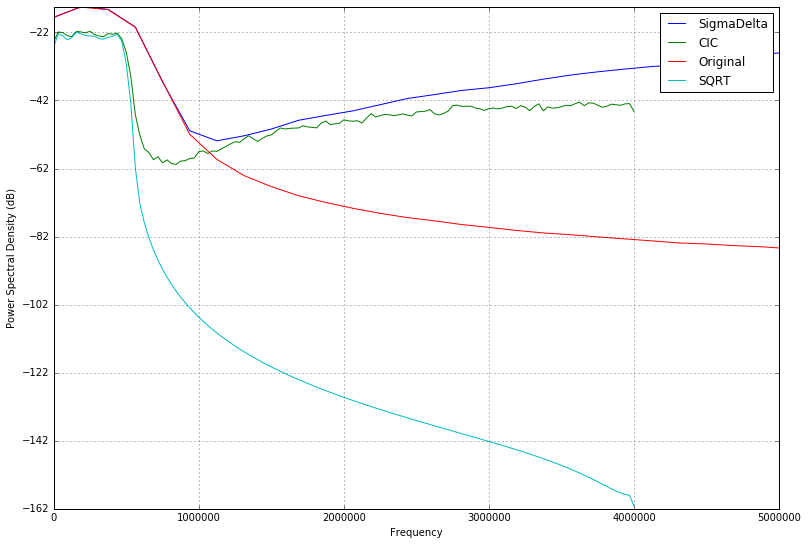

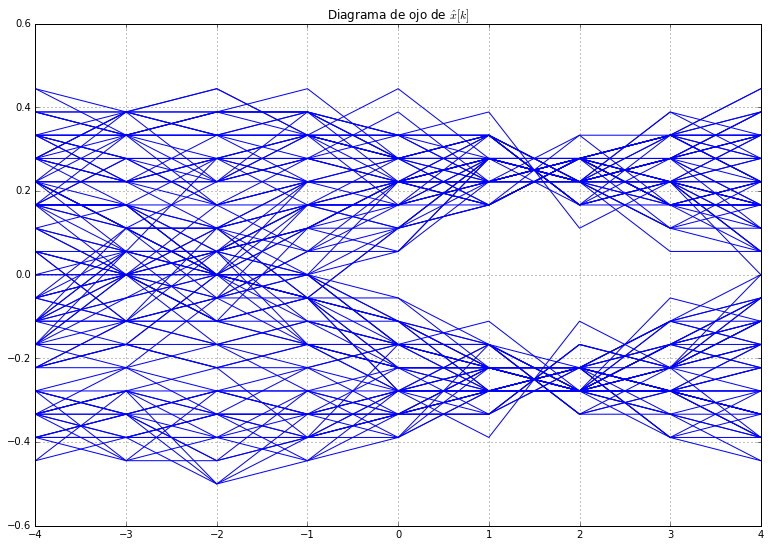

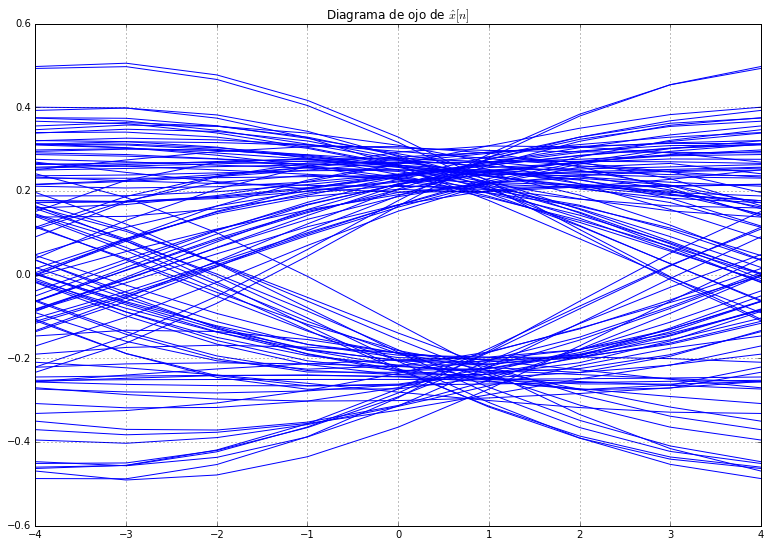

In [5]:
R=8
M=2^4
%rerun 3-4

### Conclusion 

Al subir el factor R (sobremuestreo de la señal final) las componentes de ruido de cuantizacion en frecuencias altas quedan mas rechazadas por el sigma delta. Por lo tanto el filtro CIC (que no tiene un muy buen rechazo de aliasing), interfiere menos en la banda base.

## M=2^5 y R=4

=== Executing: ===
fs=R*f0*M;             #% Frecuencia de muestreo, in Hz
Ts=1/fs;
N=15000;
#%============================================
#% Generacion de senal en bandabase
#%============================================
t,g=commpy.rcosfilter(4000/M, .1, 1/f0, fs)  #% Filtro Tx a R*M

t,gR=commpy.rcosfilter(4000, .1, 1/f0, f0*R)  #% Filtro Tx a M
ak = 2*np.random.randint(2,size=(1,N))-1


xn=np.zeros((N*int(fs/f0)))
xnR=np.zeros((N*R))


xn[::R*M]=ak
xnR[::R]=ak

x=scipy.signal.lfilter(g,1,xn);

x=x[10:]*.25
xR=scipy.signal.lfilter(gR/(1.*sum(gR)),1,xnR);

#%============================================
#% Conversor Sigma-Delta de 2do Orden y Filtro CIC de 2 Etapas
#%============================================
e1=np.zeros(N*M);
e2=np.zeros(N*M);
s1=np.zeros(N*M);
s2=np.zeros(N*M);
y=np.ones(N*M);
xhat=np.zeros(N);
xhat1=np.zeros(N);
xhat2=np.zeros(N);
k=1;
y_acum1=0;
y_acum2=0;
for n in range(1,N*M):
    e1[n]=x[n]-y[n-1];
    s1[n]=e1[n]+s1[n-1];
    e2[n]=s1[n]-y[n-1];
    s2[n]=e2

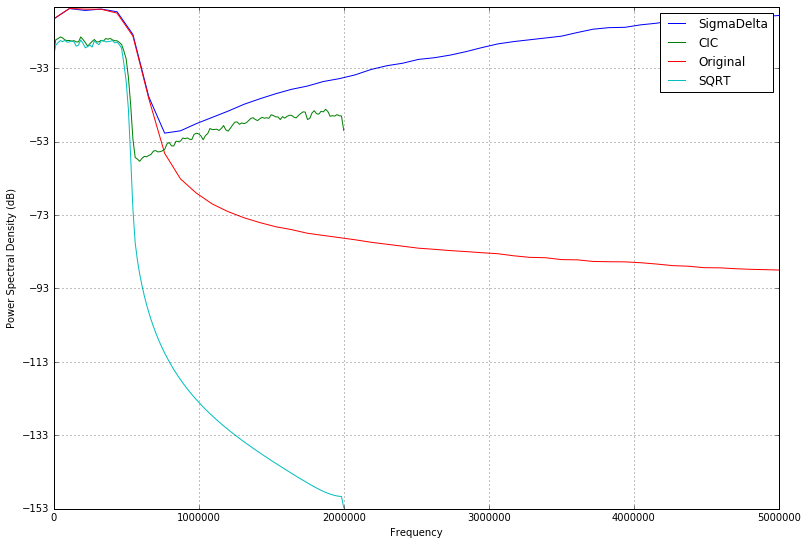

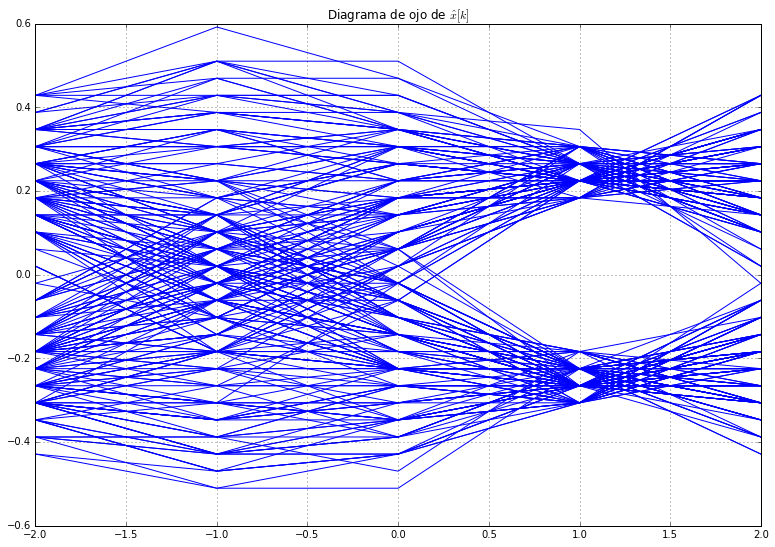

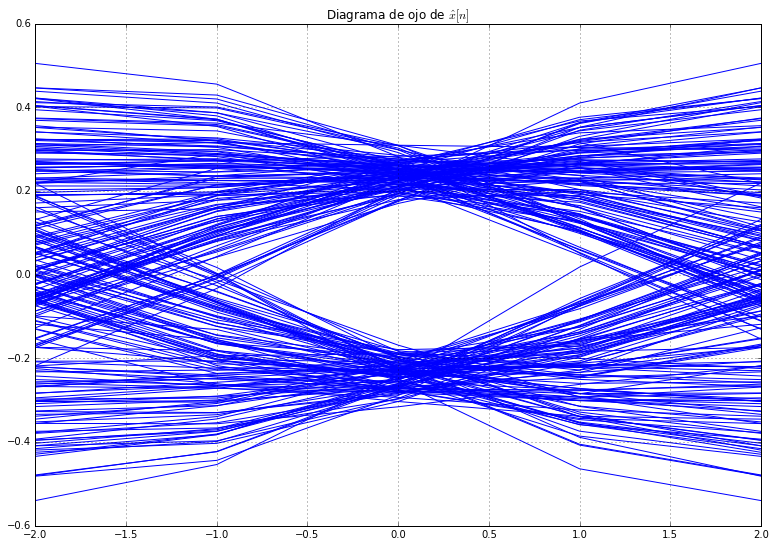

In [9]:
R=4
M=2^5
%rerun 3-4

### Conclusion 
Al subir el factor M (decimacion en el CIC) las componentes de ruido de cuantizacion en frecuencias altas quedan mas lejos por el sigma delta. Al mismo tiempo el filtro CIC con un valor mayor de M rechaza mejor el aliasing y la señal de salida tiene casi el mismo rechazo fuera de banda pero con menos muestras por simbolo, factor R. 